In [2]:
library(lme4)
library(e1071) 
library(parameters) 
options(scipen = 100)


data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_tiktok,socialMedias_tumblr,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1081638935120663168,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,High,0.5,0.2,0.75,1.0,0.7142857
2,-1081638935120663168,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,Low,0.6,0.9,1.00,1.0,0.4000000
3,-1270070629648869632,1,2021-06-04 13:40:35.701000+00:00,undergrad,left,True,31,0,0,1,⋯,1,0,1,Control,High,0.1,0.0,0.00,0.0,1.0000000
4,-1270070629648869632,1,2021-06-04 13:40:35.701000+00:00,undergrad,left,True,31,0,0,1,⋯,1,0,1,Control,Low,0.0,0.3,0.00,0.0,0.0000000
5,-1603109074363248896,1,2021-06-03 14:34:00.899000+00:00,undergrad,centreLeft,False,25,0,0,1,⋯,1,0,0,Control,High,0.1,0.0,0.75,0.5,1.0000000
6,-1603109074363248896,1,2021-06-03 14:34:00.899000+00:00,undergrad,centreLeft,False,25,0,0,1,⋯,1,0,0,Control,Low,0.0,0.3,0.25,0.0,0.0000000


In [3]:
md.denies = lmer(Denies ~ evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000026849613435297
evidenceLow,0.0000000000003604592


Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -74.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5976 -0.5330 -0.1025  0.4043  3.3859 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.003348 0.05786 
 Residual             0.035292 0.18786 
Number of obs: 202, groups:  user_id, 109

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.09641    0.01995   4.833
evidenceLow  0.22074    0.02655   8.315

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.694

In [4]:
md.denies = lmer(Denies ~ evidence * condition + (1 |user_id), data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0036195617714
evidenceLow,0.0000003480119
conditionTreatment,0.4351658272722
evidenceLow:conditionTreatment,0.5189081483144


Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -68.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7218 -0.5695 -0.2256  0.3275  3.2524 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.002819 0.05309 
 Residual             0.035520 0.18847 
Number of obs: 202, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.08152    0.02768   2.945
evidenceLow                     0.20316    0.03725   5.454
conditionTreatment              0.03110    0.03977   0.782
evidenceLow:conditionTreatment  0.03447    0.05325   0.647

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.694              
cndtnTrtmnt -0.696  0.483       
evdncLw:cnT  0.485 -0.699 -0.698

Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


## linearity and constant variance 

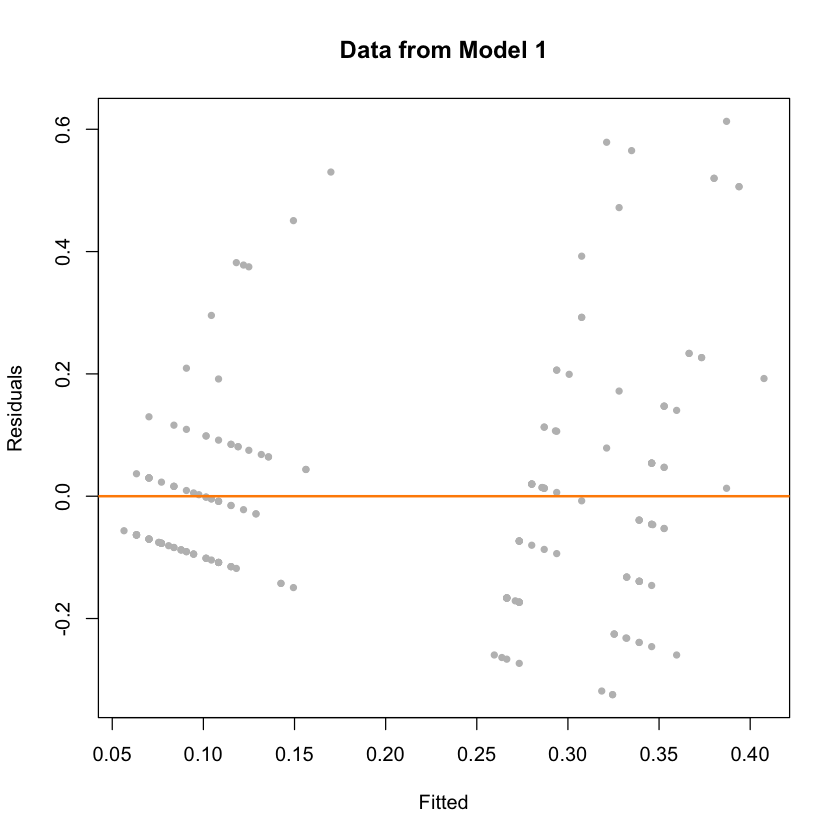

In [5]:
plot(fitted(md.denies), resid(md.denies), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

## Normality

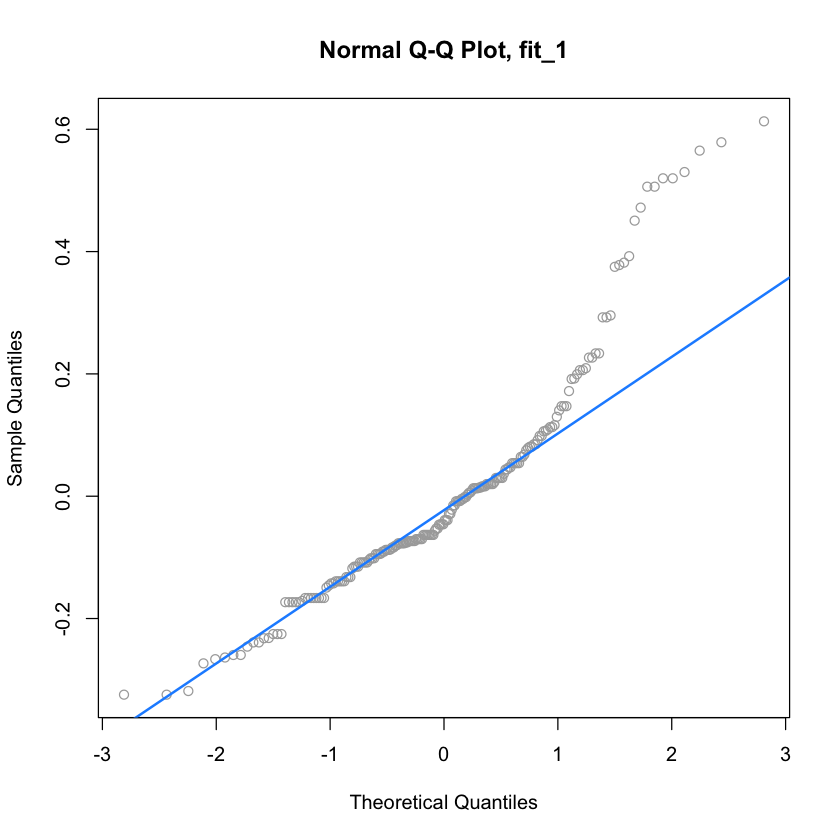

In [6]:
qqnorm(resid(md.denies), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.denies), col = "dodgerblue", lwd = 2)

In [7]:
shapiro.test(resid(md.denies))


	Shapiro-Wilk normality test

data:  resid(md.denies)
W = 0.90047, p-value = 0.0000000002324


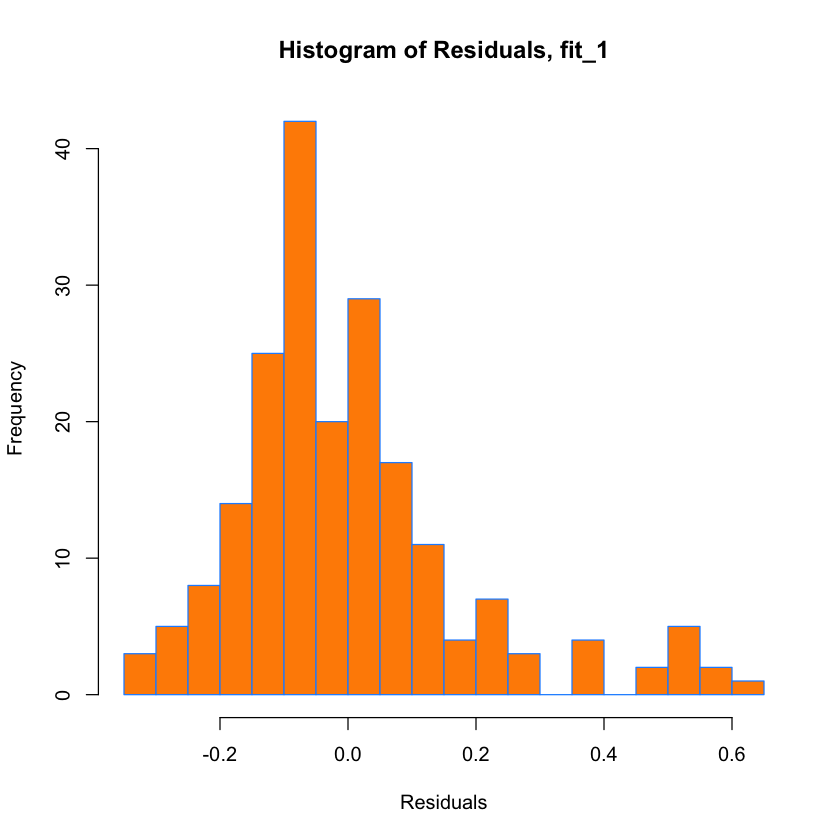

In [8]:
hist(resid(md.denies),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

In [9]:
skewness(data$Denies)$Skewness
skewness(sqrt(data$Denies))$Skewness

[1] 1.385623

[1] 0.08233255

In [10]:
md.denies = lmer(sqrt(Denies) ~ evidence + (1 |user_id), 
                 data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000000000002038083
evidenceLow,0.0000000000000001902899


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -11.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.24416 -0.84928  0.09398  0.57067  2.51740 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.004923 0.07016 
 Residual             0.047999 0.21909 
Number of obs: 202, groups:  user_id, 109

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.20971    0.02335   8.982
evidenceLow  0.30560    0.03097   9.868

Correlation of Fixed Effects:
            (Intr)
evidenceLow -0.692

In [17]:
md.denies = lmer(sqrt(Denies) ~ evidence*condition + (1 |user_id), 
                 data = data)
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000451890352
evidenceLow,0.0000000005304849
conditionTreatment,0.2614481430695684
evidenceLow:conditionTreatment,0.8953447185212631


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.28750 -0.76568  0.04558  0.64462  2.45374 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.004007 0.0633  
 Residual             0.048613 0.2205  
Number of obs: 202, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                    0.184571   0.032432   5.691
evidenceLow                    0.300671   0.043581   6.899
conditionTreatment             0.052469   0.046590   1.126
evidenceLow:conditionTreatment 0.008217   0.062307   0.132

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.693              
cndtnTrtmnt -0.696  0.482       
evdncLw:cnT  0.485 -0.699 -0.697

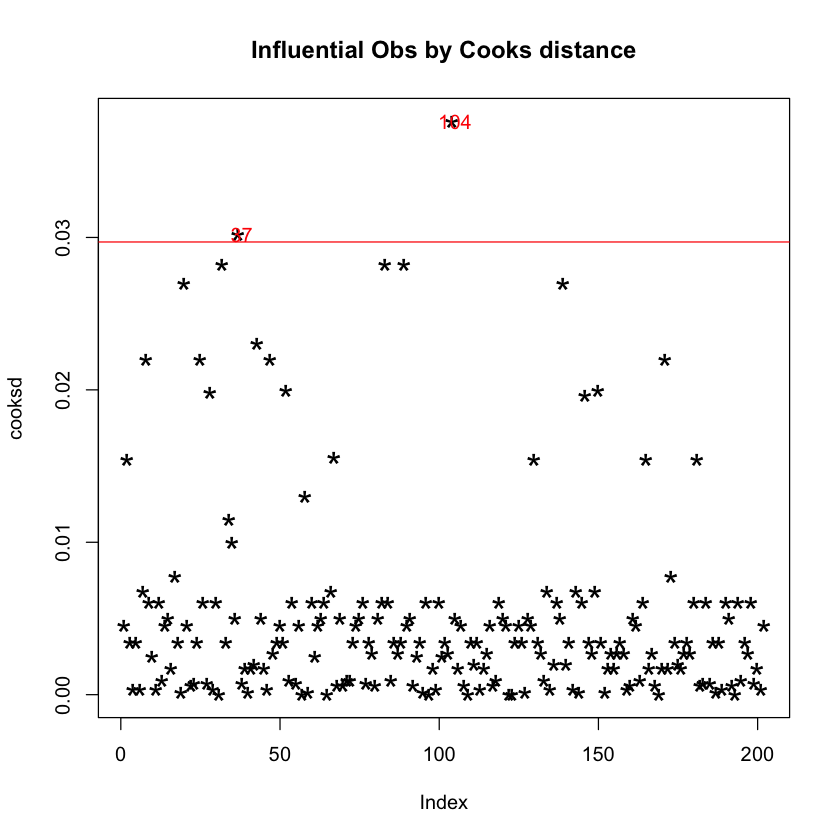

In [66]:
mod <- lm(sqrt(Denies) ~ evidence*condition + (1 |user_id),data=data)
cooksd <- cooks.distance(mod)
thresh <- 6
# Plot the Cook's Distance using the traditional 4/n criterion
sample_size <- nrow(data)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = thresh/sample_size, col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>thresh/sample_size, names(cooksd),""), col="red")  # add label

In [68]:
md.denies = lmer(sqrt(Denies) ~ evidence * condition + (1 |user_id), 
                 data = data,
                 subset = cooksd<=(thresh/sample_size)
                )
p_value_satterthwaite(md.denies)
summary(md.denies)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000000192949067
evidenceLow,0.0000000003687564
conditionTreatment,0.5364048882525552
evidenceLow:conditionTreatment,0.6072223484091452


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Denies) ~ evidence * condition + (1 | user_id)
   Data: data
 Subset: cooksd <= (thresh/sample_size)

REML criterion at convergence: -16.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.39029 -0.80492 -0.00166  0.62500  2.26287 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.002288 0.04784 
 Residual             0.047439 0.21780 
Number of obs: 200, groups:  user_id, 109

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.18480    0.03153   5.860
evidenceLow                     0.30065    0.04301   6.991
conditionTreatment              0.02838    0.04581   0.619
evidenceLow:conditionTreatment  0.03190    0.06186   0.516

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.703              
cndtnTrtmnt -0.688  0.484       
evdncLw:cnT  0.489 -0.695 -0.711

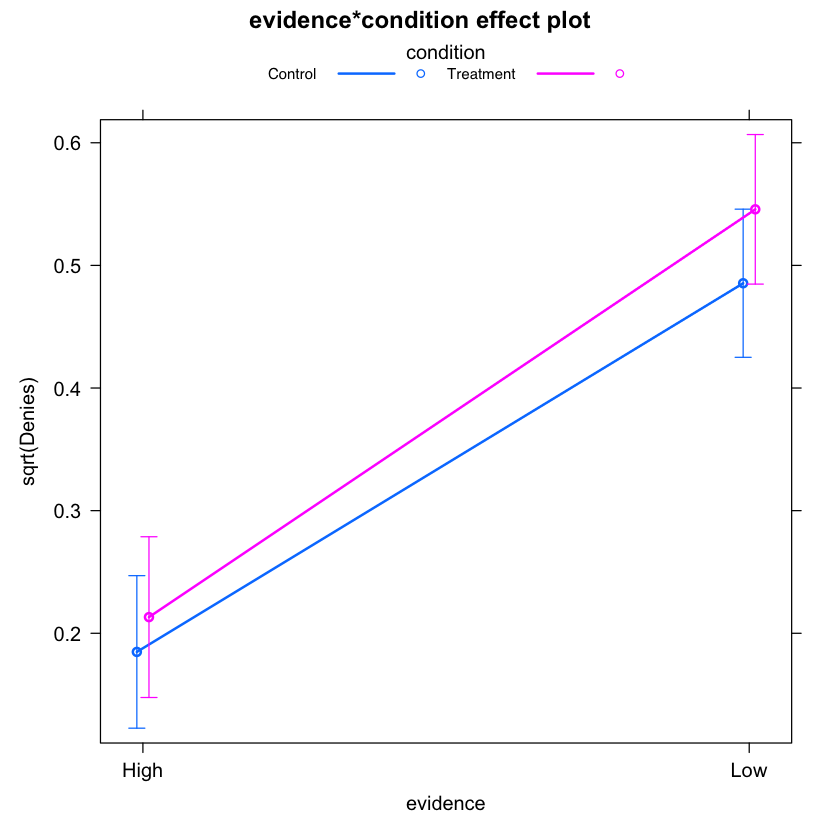

In [69]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")